In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential

from keras.layers import Dense, Dropout
# from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

ImportError: No module named keras

In [60]:
df_train = pd.read_csv('./data/asilomar_nov182017_all.csv')
# this is actually [u1, v1, u2, v2]
X = df_train[['u','v','w','h']]
y = df_train['distance']

In [2]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.30)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

NameError: name 'train_test_split' is not defined

In [62]:
NUM_FEATURES = len(X.columns)

In [63]:
def dist_regression_neural_net():
    model = Sequential()
    model.add(Dense(NUM_FEATURES*4, input_dim=NUM_FEATURES, activation='relu'))
#     model.add(BatchNormalization())
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
#     model.add(BatchNormalization())
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
#     model.add(BatchNormalization())
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
#     model.add(BatchNormalization())
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
#     model.add(BatchNormalization())
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
    model.add(Dense(NUM_FEATURES*4, activation='relu'))
    model.add(Dense(1))
    return model

In [75]:
from keras.optimizers import Adam
opt = Adam(lr=0.01)
model = dist_regression_neural_net().compile(loss='mean_squared_error', optimizer=opt)
neural_net = dist_regression_neural_net()
neural_net.fit(x=X_train, 
          y=y_train, 
          batch_size=32, 
          epochs=30, validation_data = (X_val, y_val))

Train on 11088 samples, validate on 4753 samples
Epoch 1/30
11088/11088 [==============================] - 1s 75us/step - loss: 1015.6877 - val_loss: 169.0422
Epoch 2/30
11088/11088 [==============================] - 1s 57us/step - loss: 162.2113 - val_loss: 150.5284
Epoch 3/30
11088/11088 [==============================] - 0s 43us/step - loss: 150.8732 - val_loss: 139.1187
Epoch 4/30
11088/11088 [==============================] - 1s 45us/step - loss: 140.5577 - val_loss: 128.4612
Epoch 5/30
11088/11088 [==============================] - 0s 44us/step - loss: 128.3986 - val_loss: 117.0210
Epoch 6/30
11088/11088 [==============================] - 1s 46us/step - loss: 120.3449 - val_loss: 109.5576
Epoch 7/30
11088/11088 [==============================] - 1s 55us/step - loss: 112.6414 - val_loss: 105.9063
Epoch 8/30
11088/11088 [==============================] - 1s 55us/step - loss: 108.6662 - val_loss: 109.4086
Epoch 9/30
11088/11088 [==============================] - 0s 45us/step - loss:

In [76]:
def evaluate_model(model, X_val, y_val):
    # training error
    pred = model.predict(X_val)

    error = y_val[:,np.newaxis]-pred
    print 'MSE: {}'.format(np.mean(np.square(error)))

    # mean absolute percentage
    mean_abs_percentage = np.mean(np.abs(error)/y_val[:,np.newaxis])
    print 'Mean Abs Percentage:{}'.format(mean_abs_percentage)

In [77]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
evaluate_model(linear_regressor, X_val, y_val)

MSE: 1266.25511175
Mean Abs Percentage:0.858455399463


In [79]:
evaluate_model(neural_net, X_val, y_val)

MSE: 88.7509389706
Mean Abs Percentage:0.114321433865


### Plot the training data

([array([   0.,    0.,  314.,  185., 1122., 3894., 5116.,  303.,  146.,
            8.]),
  array([2.000e+00, 1.500e+01, 2.300e+01, 3.860e+02, 1.163e+03, 5.089e+03,
         3.240e+03, 1.026e+03, 1.020e+02, 4.200e+01]),
  array([   0.,    0.,  357.,   51.,  210., 7340., 1871., 1043.,  119.,
           97.]),
  array([   0.,    0.,    0.,    0., 1842., 6050., 1342., 1654.,  200.,
            0.])],
 array([-5.98124678, -4.94626002, -3.91127326, -2.8762865 , -1.84129974,
        -0.80631298,  0.22867378,  1.26366054,  2.2986473 ,  3.33363406,
         4.36862082]),
 <a list of 4 Lists of Patches objects>)

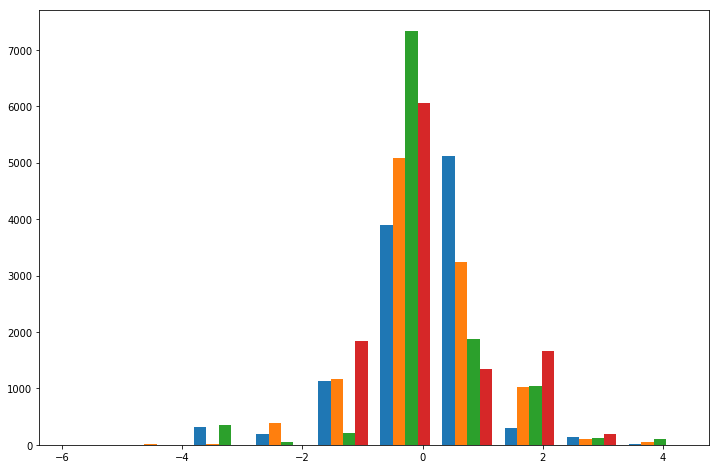

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.hist(X_train)

### Let's evaluate a single sample with the neural net

In [83]:
def eval_single_sample(model, X, y, sample_index=0):
    print("Ground truth:")
    print(X.loc[sample_index], y.loc[sample_index])
    X_single_sample = scaler.transform([X.loc[sample_index].values])
    X_single_sample
    y_single_sample = y[sample_index]
    single_prediction = model.predict(x=X_single_sample)
    print("prediction: {}".format(single_prediction))
eval_single_sample(neural_net, X,y, sample_index=50)

Ground truth:
(u    262
v    252
w    341
h    326
Name: 50, dtype: int64, 43.30380716)
prediction: [[44.18644]]


TODO: plot predictions vs ground truth